In [ ]:
#PLOTTING HISTOGRAM ,BOXPLOT,PAIRPLOT AND SCATTERPLOT (PART-1)

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv(r"D:\Winfactor\customers_dataset.csv") #Accessing dataset
#print(data)
#print(data.to_string()) 
plt.figure(figsize=(15,12), facecolor='khaki')

#Histograms 1,2,3

plt.subplot(3, 3, 1)
plt.hist(data["Annual Income (k$)"], color='darkred')
plt.xlabel("Annual Income (K$)")
plt.ylabel("Number of persons")
plt.title("Histogram of Annual Income",fontweight='bold')
plt.grid()


plt.subplot(3, 3, 2)
plt.hist(data["Age"],color = 'lime')
plt.xlabel("Age")
plt.ylabel("Number of persons")
plt.title("Histogram of Age",fontweight='bold')
plt.grid()

plt.subplot(3, 3, 3)
plt.hist(data["Spending Score (1-100)"], color ='b')
plt.xlabel("Spending Score")
plt.ylabel("Number of persons")
plt.title("Histogram of Spending Score",fontweight='bold')
plt.grid()

#Scatterplots 1,2,3

plt.subplot(3, 3, 4)
plt.scatter(data.index, data["Annual Income (k$)"], color='orange')
plt.xlabel("No. of persons")
plt.ylabel("Annual Income (k$)")
plt.title("Scatterplot of Annual Income vs Count",fontweight='bold')


plt.subplot(3,3, 5)
plt.scatter(data.index, data["Age"], color='hotpink')
plt.xlabel("No. of persons")
plt.ylabel("Age")
plt.title("Scatterplot of Age vs Count",fontweight='bold')


plt.subplot(3, 3, 6)
plt.scatter(data.index, data["Spending Score (1-100)"], color='purple')
plt.xlabel("No. of persons")
plt.ylabel("Spending Score")
plt.title("Scatterplot of Spending Score vs Count",fontweight='bold')

#Boxplots 1,2,3


plt.subplot(3, 3, 7)
sns.boxplot(x=data["Annual Income (k$)"], color='lavender')
plt.title("Boxplot of Annual Income",fontweight='bold')


plt.subplot(3, 3, 8)
sns.boxplot(x=data["Age"], color='orange')
plt.title("Boxplot of Age",fontweight='bold')


plt.subplot(3, 3, 9)
sns.boxplot(x=data["Spending Score (1-100)"], color='indigo')
plt.title("Boxplot of Spending Score",fontweight='bold')

plt.suptitle("Customer Data Analysis - Using Histograms, Boxplots,PairPlots and Scatterplots", fontsize=32,fontweight='bold', color='midnightblue')

plt.tight_layout(rect=[0, 0, 1, 0.97]) #Used to avoid overlap in 3x3 gridd
plt.show()

# Pairplot using seaborn 

CUSTOMER_data = data[["Annual Income (k$)", "Age", "Spending Score (1-100)"]]

sns.pairplot(CUSTOMER_data)  
plt.suptitle("Pairplot of Customer Data Analysis", fontsize=33, fontweight='bold', color='midnightblue')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [ ]:
#LOG AND SQUARE ROOT TRANSFORMS OF SKEWED DATASETS (PART-2)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r"D:\Winfactor\customers_dataset.csv")
#print(data.to_string())  # Display full dataset

data.to_csv(r"D:\Winfactor\customers_dataset_transformed.csv")
print(data.head())
print('                                ')
print('                                ')
print(data.to_csv)

log_transform = lambda x : np.log1p(x) #log func
data [['Annual Income (k$)','Age']].apply(log_transform)

sqrt_transform = lambda x : np.sqrt(x) #sqrt func
data [['Annual Income (k$)','Age']].apply(sqrt_transform)


print('THE SKEW VALUE OF SPENDING SCORE(1-100) IS ALREADY ZERO AND MEAN=MEDIAN=MODE. HENCE NO NEED TO TRANSFORM.')
print('                                ')
print('                                ')
print('Initial skew value of Annual income is:', data['Annual Income (k$)'].skew())
print('                                ')
print('After log transformation skew value of Annual income is:', np.log1p(data['Annual Income (k$)']).skew())
print('After sqrt transformation skew value of Annual income is:', np.sqrt(data['Annual Income (k$)']).skew())
print('                                ')
print('             ------             ')
print('                                ')
print('Initial skew value of Age is:',data['Age'].skew())
print('                                ')
print('After log transformation skew value of Age is:', np.log1p(data['Age']).skew())
print('After sqrt transformation skew value of Age is:', np.sqrt(data['Age']).skew())



# Ploting original vs Transformed

plt.figure(figsize=(12, 12), facecolor='cyan')

plt.subplot(3, 3, 1)
sns.histplot(data['Annual Income (k$)'], kde=True, color='skyblue')
plt.title('Annual Income (Original)')

plt.subplot(3, 3, 2)
sns.histplot(np.log1p(data['Annual Income (k$)']), kde=True, color='maroon')
plt.title('Annual Income (Log Transformed)')

plt.subplot(3, 3, 3)
sns.histplot(np.log1p(data['Annual Income (k$)']), kde=True, color='green')
plt.title('Annual Income (Sqrt Transformed)')



plt.subplot(3, 3, 4)
sns.histplot(data['Age'], kde=True, color='darkblue')
plt.title('Age (Original)')

plt.subplot(3, 3, 5)
sns.histplot(np.log1p(data['Age']), kde=True, color='gold')
plt.title('Age (Log Transformed)')

plt.subplot(3, 3, 6)
sns.histplot(np.log1p(data['Age']), kde=True, color='purple')
plt.title('Age (Sqrt Transformed)')

plt.tight_layout(rect=[0, 0, 1,0.95])
plt.suptitle("Log and Square Root Transforms of Skewed Data", fontsize=22,fontweight='bold', color='darkviolet')



In [ ]:
#BOX-COX SKEW TRANSFORMATION

import pandas as pd
import numpy as np
from scipy.stats import skew
from sklearn.preprocessing import power_transform
import matplotlib.pyplot as plt
import seaborn as sns

###
data = pd.read_csv(r"D:\Winfactor\customers_dataset.csv")
X = data[['Annual Income (k$)']]

box=power_transform(data[['Annual Income (k$)']], method ='box-cox') #Box cox algo
print('before transformation skew value is :', data['Annual Income (k$)'].skew())
print('after transformation skew value is :', (skew(box)))

data.to_csv(r"D:\Winfactor\customers_dataset_transformed.csv")
print("Customer CSV saved with Box-Cox transformed income.")
print(data.to_csv)

#Plotting distribution
plt.figure(figsize =(6,6))
plt.subplot(2,2, 1)
plt.hist(data["Annual Income (k$)"], color='indigo')
plt.xlabel("Annual Income (K$)")
plt.ylabel("Number of persons")
plt.title("Data of Annual Income")
plt.grid(True, linestyle='--', linewidth=1.5)


plt.subplot(2,2, 2)
plt.hist(box,color = 'lime')
plt.xlabel("Annual Income (K$)")
plt.ylabel("Number of persons")
plt.title("Transformed Annual Income")
plt.grid(True, linestyle='--', linewidth=1.5)

plt.suptitle('Skew Transformation using BOX-COX', fontweight='bold',color='darkgreen')
plt.tight_layout()
plt.show()

In [ ]:
#MinMaxScaler Transformations

from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy

data = pd.read_csv(r"D:\Winfactor\customers_dataset.csv")
print(data.head())
# print(data.to_string())


# Function of MinMaxScaler
scaler = MinMaxScaler()
Scaler_Data[["Annual Income (k$)", "Age", "Spending Score (1-100)"]]=scaler.fit_transform(data[["Annual Income (k$)", "Age", "Spending Score (1-100)"]])

data.to_csv(r"D:\Winfactor\customers_dataset_transformed.csv")
#print(data.to_csv)

# Plot for histograms
plt.figure(figsize=(15, 15), facecolor='lightgrey')  

plt.subplot(3, 3, 1)
plt.hist(data["Annual Income (k$)"], color='peru')
plt.xlabel("Annual Income (K$)")
plt.ylabel("Number of persons")
plt.title(" Annual Income")
plt.grid()


plt.subplot(3, 3, 2)
plt.hist(data["Age"],color = 'indigo')
plt.xlabel("Age")
plt.ylabel("Number of persons")
plt.title("Age")
plt.grid()

plt.subplot(3, 3, 3)
plt.hist(data["Spending Score (1-100)"], color ='darkgreen')
plt.xlabel("Spending Score")
plt.ylabel("Number of persons")
plt.title("Spending Score")
plt.grid()

#Plots for scaled histograms
plt.subplot(3, 3, 4)
plt.hist(Scaler_Data["Annual Income (k$)"], color='hotpink')
plt.xlabel("Scaled Annual Income")
plt.ylabel("Number of persons")
plt.title("Scaled Annual Income")
plt.grid()

plt.subplot(3, 3, 5)
plt.hist(Scaler_Data["Age"], color='grey')
plt.xlabel("Scaled Age")
plt.ylabel("Number of persons")
plt.title("Scaled Age")
plt.grid()

plt.subplot(3, 3, 6)
plt.hist(Scaler_Data["Spending Score (1-100)"], color='cyan')
plt.xlabel("Scaled Spending Score")
plt.ylabel("Number of persons")
plt.title("Scaled Spending Score")
plt.grid()

plt.tight_layout()
plt.suptitle("Normalization using MinMaxScaler",fontsize=32,fontweight='bold', color='darkviolet')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


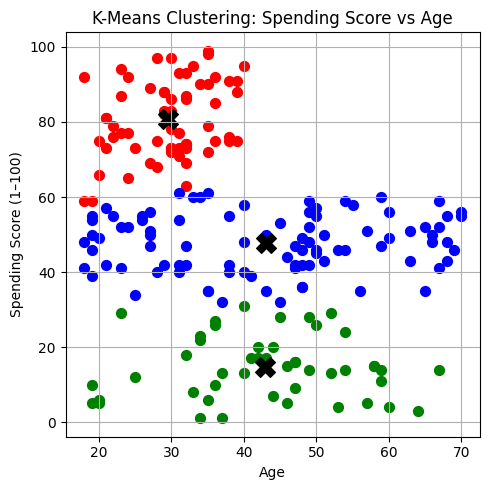

In [ ]:
#K MEANS CLUSTERING OF SPENDING SCORE VS AGE
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data = pd.read_csv(r"D:\Winfactor\customers_dataset.csv")
X = data[["Age", "Spending Score (1-100)"]]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
data['Cluster'] = kmeans.labels_

plt.figure(figsize=(5,5)) # Plotting the clusters
colors = ['red', 'green', 'blue']

for i in range(3):
    cluster = data[data['Cluster'] == i]
    plt.scatter(cluster['Age'], cluster['Spending Score (1-100)'],s=50, color=colors[i])

centers = kmeans.cluster_centers_ # Cluster centers
plt.scatter(centers[:, 0], centers[:, 1],s=200, c='black', marker='X')

plt.xlabel("Age")
plt.ylabel("Spending Score (1–100)")
plt.title("K-Means Clustering of Spending Score vs Age")
plt.grid()
plt.tight_layout()           
plt.show()

In [ ]:
#Elbow method to find number of clusters in SPENDING SCORE VS ANNUAL INCOME

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data = pd.read_csv(r"D:\Winfactor\customers_dataset.csv")
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]


n = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    n.append(kmeans.inertia_)  

#Elbow graph
plt.figure(figsize=(8,5),facecolor='yellow')

plt.plot(range(1, 15), n, marker='o')
plt.title('Elbow Method for Optimal K', fontsize=14, fontweight='bold',color='red')
plt.xlabel('Number of clusters (k)', fontsize=12,color='indigo')
plt.ylabel('Inertia', fontsize=12, color='indigo')
plt.grid(color='darkgreen')
plt.tight_layout()

plt.show()



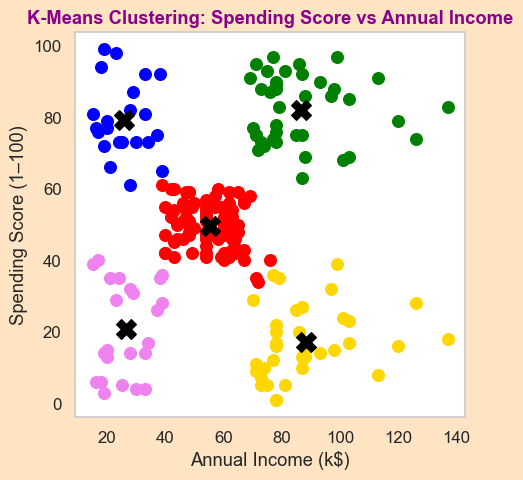

In [ ]:
#K MEANS CLUSTERING OF SPENDING SCORE VS ANNUAL INCOME

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


data = pd.read_csv(r"D:\Winfactor\customers_dataset.csv")
X = data[['Annual Income (k$)','Spending Score (1-100)']]

kmeans = KMeans(n_clusters=5, random_state=100) #Through observation
kmeans.fit(X)
data['Cluster']=kmeans.labels_

plt.figure(figsize=(5,5), facecolor='bisque')
colors = ['red', 'green', 'blue','violet','gold']

for i in range(5):
 cluster = data[data['Cluster']==i]
 plt.scatter(cluster['Annual Income (k$)'], cluster ['Spending Score (1-100)'],s=70, color = colors[i])

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],s=200, c='black', marker='X')


plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1–100)")
plt.title("K-Means Clustering: Spending Score vs Annual Income", fontweight ='bold', color ='darkmagenta')
plt.grid()
plt.tight_layout()
plt.show()


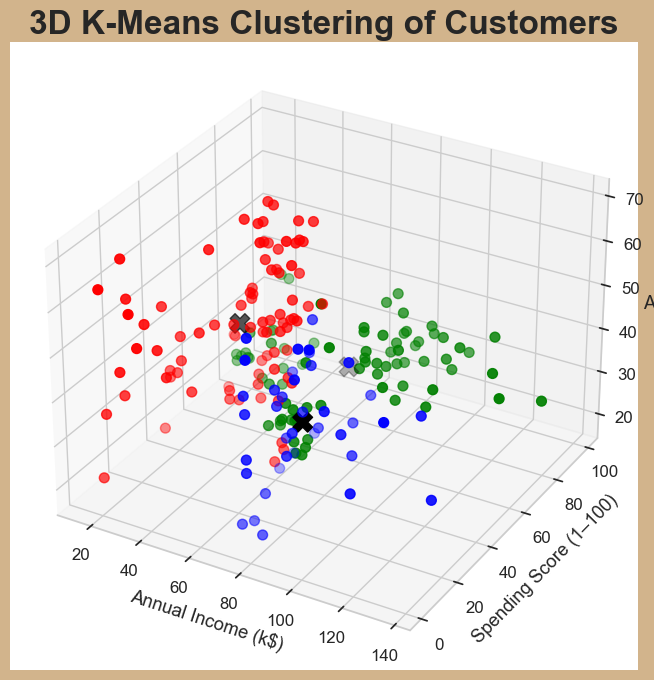

In [ ]:
#Visualization in 3D of K MEANS CLUSTERING OF CUSTOMER DATA
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans


data = pd.read_csv(r"D:\Winfactor\customers_dataset.csv") 
X = data[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']]
# KMEANS ALGO
kmeans = KMeans(n_clusters=3, random_state=100)
kmeans.fit(X)
data['Cluster'] = kmeans.labels_

centroids = kmeans.cluster_centers_

# Plotting in 3D
fig = plt.figure(figsize=(10, 7), facecolor='tan')
ax = fig.add_subplot( projection='3d')
colors = ['red', 'green', 'blue']
for i in range(3):
    cluster = data[data['Cluster'] == i]
    ax.scatter(cluster['Annual Income (k$)'],cluster['Spending Score (1-100)'],cluster['Age'],c=colors[i],s=50)

#centroids
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2],s=200, c='black', marker='X', label='Centroids')
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1–100)')
ax.set_zlabel('Age')
ax.set_title('3D K-Means Clustering of Customers', fontsize=24, fontweight='bold')
plt.tight_layout()
plt.show()


In [ ]:
# K MEANS CLUSTERING OF ASH VS PHENOL FROM WINE DATASET
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


data = pd.read_csv(r"D:\Winfactor\wine.csv")
print(data.head()) 
X = data[['Ash', 'Phenols']]
kmeans = KMeans(n_clusters=3, random_state=69)
kmeans.fit(X)
data['Cluster'] = kmeans.labels_

plt.figure(figsize=(7,7))
colors = ['red', 'blue', 'green']

for i in range(3):
    cluster = data[data['Cluster'] == i]
    plt.scatter(cluster['Ash'], cluster['Phenols'], s=50, color=colors[i])

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X')

plt.xlabel('Ash')
plt.ylabel('Phenol')
plt.title('K-Means Clustering: Ash vs Phenol', fontweight='bold')
plt.legend()
plt.grid(color='cyan')
plt.tight_layout()
plt.show()


In [ ]:
#3D K-Means Clustering of Alcholic beverages

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


data = pd.read_csv(r"D:\Winfactor\wine.csv")
print(data.head()) 

X = data[['Hue', 'Alcohol','Mg']]

kmeans= KMeans(n_clusters = 3)
kmeans.fit(X)
data['Cluster']=kmeans.labels_

fig = plt.figure(figsize=(9,9), facecolor='lightgrey')
ax=fig.add_subplot(projection ='3d')
colors = ['red', 'midnightblue', 'lime']
centroids = kmeans.cluster_centers_
for i in range(3):
 cluster = data[data['Cluster']==i]
 ax.scatter(cluster['Hue'], cluster['Alcohol'], cluster['Mg'], color=colors[i], s=50)

ax.scatter(centroids[:,0],centroids[:,1],centroids[:,2] ,s=320, c='black', marker='X', edgecolor='black')

#AXIS
ax.set_facecolor('lightcyan')
ax.set_xlabel('Hue',fontsize=20,color='indigo')
ax.set_ylabel('Alcohol',fontsize=20,color='indigo')
ax.set_zlabel('Mg',fontsize=11)
ax.set_title('3D K-Means Clustering of Alcholic beverages', fontsize=24, fontweight='bold')
plt.tight_layout()
plt.show()



Annual income vs person and Age vs person were  both positive skewed. Using skew transformations 3 techniques(sqrt,log,box-cox), data became more symmetric in middle.

In K means clustering of Income vs Spending score, I observed 5 different clusters.

Blue cluster represents low earning-high spenders.
Pink cluster represents low earning-low spenders.
Red cluster represents moderate earning-moderate spenders.
Green cluster represents high earning-high spenders.
Yellow cluster represents high earning-low spenders.